# Land Use and Land Cover Classification Through Transfer Learning with VGG16



Here is the Link to the EuroSAT Dataset that are used in this Project : [Link](https://github.com/phelber/eurosat)

# Essential Libraries

In [34]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow.python.keras as k
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential,save_model
from tensorflow.keras.layers import Dense, Flatten,Dropout
%matplotlib inline

# Main Directory where all the Data is Stored

In [22]:
directory=r'/home/rachit/Documents/internship/EXTRA/change/scripts/data'

# Visualization of Images that are stored in Each Class's Folder

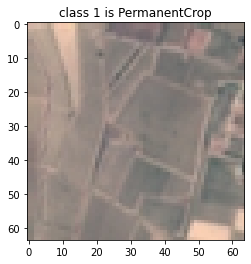

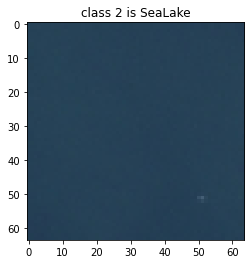

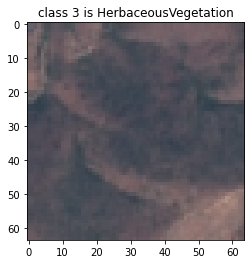

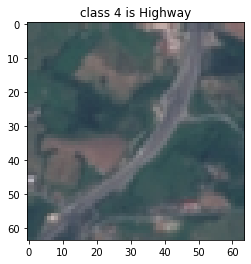

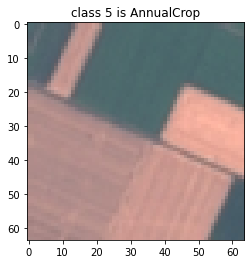

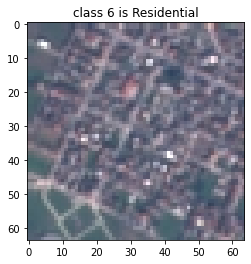

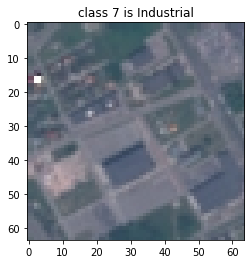

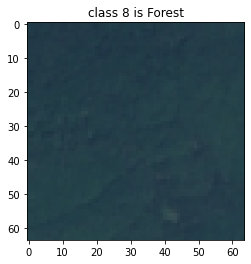

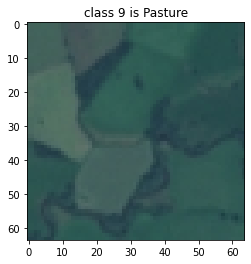

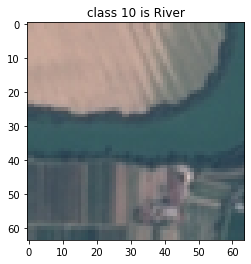

In [25]:

main_directory="/home/rachit/Documents/internship/EXTRA/change/scripts/data"

class_folders=[folder for folder in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory,folder))]


n=0
c=0
for folder in class_folders:
    class_path=os.path.join(main_directory,folder)
    file_path=[file for file in os.listdir(class_path) if file.lower().endswith(('.png','.jpg','.jpeg'))]
    if file_path:
        first_image=os.path.join(class_path,file_path[0])
        n=n+1
        plt.subplot(2,5,1)
        img=mpimg.imread(first_image)
        plt.imshow(img)
        # file_name = os.path.splitext(file_path[0])[0] 
        plt.title(f'class {n} is {class_folders[c]}')
        c=c+1
        plt.show()

# Parameters that are useful for Preprocessing of Images

In [26]:
batch_size = 32
img_height = 64
img_width = 64
validation_split=0.2
rescale=1.0/255

# Data Augmentation to increase the size and diversity of training dataset for VGG16 Model

In [27]:
datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=validation_split
)

# Creating the Training and Validation Data for the VGG16 Model

In [29]:

train_data = datagen.flow_from_directory(
    directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)

validation_data = datagen.flow_from_directory(
    directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  
)


Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


# Pretrained VGG16 Model 

In [30]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freezing the Convolution Layers and Setting up the Model for Training and Prediction of Land Use-Land Cover Classes

In [31]:

for layer in base_model.layers:
    layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add((Dense(10, activation='softmax')))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 15,241,802
Trainable params: 527,114
Non-trainable params: 14,714,688
_________________________________________________________________


In [32]:
history = model.fit(train_data, validation_data=validation_data, epochs=20, batch_size=32) 

Epoch 1/20
675/675 [==============================] - 360s 532ms/step - loss: 0.9747 - accuracy: 0.6519 - val_loss: 0.6849 - val_accuracy: 0.7704
Epoch 2/20
675/675 [==============================] - 363s 537ms/step - loss: 0.7292 - accuracy: 0.7460 - val_loss: 0.6082 - val_accuracy: 0.7863
Epoch 3/20
675/675 [==============================] - 330s 489ms/step - loss: 0.6717 - accuracy: 0.7655 - val_loss: 0.5495 - val_accuracy: 0.8122
Epoch 4/20
675/675 [==============================] - 315s 466ms/step - loss: 0.6333 - accuracy: 0.7780 - val_loss: 0.5527 - val_accuracy: 0.8124
Epoch 5/20
675/675 [==============================] - 350s 518ms/step - loss: 0.6135 - accuracy: 0.7882 - val_loss: 0.5050 - val_accuracy: 0.8207
Epoch 6/20
675/675 [==============================] - 371s 550ms/step - loss: 0.5991 - accuracy: 0.7913 - val_loss: 0.5291 - val_accuracy: 0.8163
Epoch 7/20
675/675 [==============================] - 368s 546ms/step - loss: 0.5760 - accuracy: 0.8018 - val_loss: 0.5042 -

# **Visualization of VGG16 Model's Performance Over Training and Validation Data**

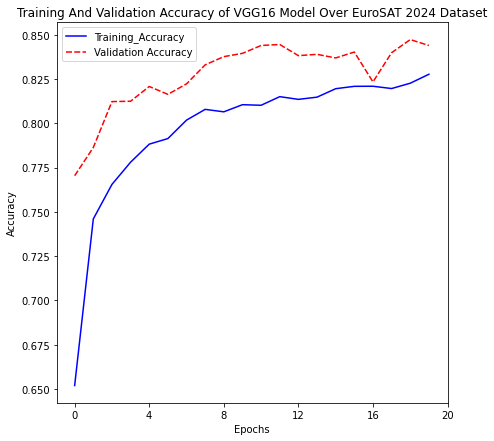

In [47]:
accuracy_df=pd.DataFrame({"Training_Accuracy":history.history["accuracy"],"Validation Accuracy":history.history["val_accuracy"]})

plt.figure(figsize=(7,7))
sns.lineplot(data=accuracy_df,palette=["blue","red"])
plt.xlabel("Epochs")
custom_ticks = [0,4,8,12,16,20]
plt.xticks(custom_ticks)
plt.ylabel("Accuracy")
plt.title("Training And Validation Accuracy of VGG16 Model Over EuroSAT 2024 Dataset")
plt.show()

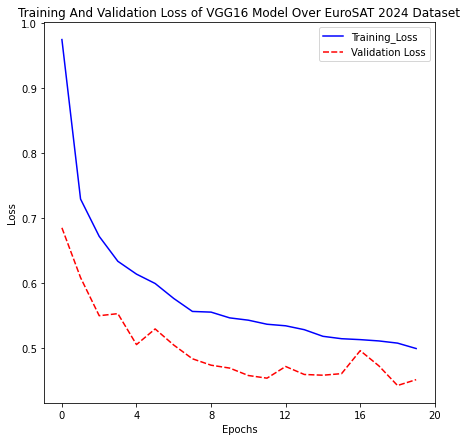

In [46]:
loss_df=pd.DataFrame({"Training_Loss":history.history["loss"],"Validation Loss":history.history["val_loss"]})

plt.figure(figsize=(7,7))
sns.lineplot(data=loss_df,palette=["blue","red"])
plt.xlabel("Epochs")
custom_ticks = [0,4,8,12,16,20]
plt.xticks(custom_ticks)
plt.ylabel("Loss")
plt.title("Training And Validation Loss of VGG16 Model Over EuroSAT 2024 Dataset") 
plt.show()

# Saving the Trained CNN Model

In [42]:
save_model(model,'multiclass_land_use_land_cover.keras')